In [1]:
### compare environmental concentrations 
###in water bodies to concentration limits

In [1]:
import numpy  as np
import  pandas as pd
import os
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
dir_in='C:/Users/easpi/Documents/PhD Water Footprint/Papers/water footprint scoping/'

In [29]:
intersection=gpd.read_file(dir_in + "gis/intersect_basins_countries.gpkg")
intersection=intersection.drop(columns={"OBJECTID"})
intersection

countries = pd.unique(intersection["Country"])
basins = pd.unique(intersection["id_basin_pcrglob"])

basins_map  = gpd.read_file(dir_in + "gis/basins shapefile/basins_5min_pcrglobwb_withparam.gpkg").set_index("id_basin_pcrglob")
basins_map=basins_map.loc[basins]

intersection = intersection.set_index(['Country'])
intersection

LCI = pd.read_csv(dir_in + "code/output/LCI_basin_part3.csv").set_index(["basin","month","activity"])

LCIA_NR  = gpd.read_file(dir_in + "code/output/LCIA_NR.gpkg").set_index("id_basin_pcrglob")#m3

LCIA_EQ  = gpd.read_file(dir_in + "code/output/LCIA_EQ_20220818.gpkg").set_index("id_basin_pcrglob")#pdf.yr


In [30]:
LCIA_EQ.columns

Index(['area', 'perimeter', 'eq_agri', 'eq_dom', 'eq_ind', 'eq_wc', 'eq_fe',
       'eq_fet', 'eq', 'eq_pol', 'eq_wc_glo', 'eq_fe_glo', 'eq_fet_glo',
       'eq_glo', 'eq_pol_glo', 'log10_eq_agri', 'log10_eq_dom', 'log10_eq_ind',
       'log10_eq_wc', 'log10_eq_fe', 'log10_eq_fet', 'log10_eq',
       'log10_eq_pol', 'log10_eq_wc_glo', 'log10_eq_fe_glo',
       'log10_eq_fet_glo', 'log10_eq_glo', 'log10_eq_pol_glo', 'geometry'],
      dtype='object')

In [31]:
LCIA_NR.columns

Index(['area', 'perimeter', 'nr_pol_path_agri', 'nr_pol_path_dom',
       'nr_pol_path_ind', 'nr_pol', 'nr_pol_sector_agri', 'nr_pol_sector_dom',
       'nr_pol_sector_ind', 'nr_wc_path_dom', 'nr_wc_path_ind',
       'nr_wc_path_agri', 'nr_wc_x', 'nr_wc_sector_agri', 'nr_wc_sector_dom',
       'nr_wc_sector_ind', 'nr_wc_y', 'nr_wc', 'nr', 'nr_sector_agri',
       'nr_sector_ind', 'nr_sector_dom', 'nr_path_agri', 'nr_path_ind',
       'nr_path_dom', 'geometry'],
      dtype='object')

In [32]:
LCI

WC              P  542-75-6   94-75-7  \
basin month activity                                                      
2501  1     domestic     9365.175781       0.000000  0.000000  0.000123   
            industry        0.000000       0.000000  0.000000  0.000326   
            agriculture  5041.759766     456.484525  0.000000  0.001256   
      2     domestic     9365.175781       0.000000  0.000000  0.000123   
            industry        0.000000       0.000000  0.000000  0.000326   
...                              ...            ...       ...       ...   
13232 11    industry        0.000000       0.000000  0.000000  0.000561   
            agriculture     0.000000  207892.703637  0.125003  0.000000   
      12    domestic        0.000000       0.000000  0.000000  0.000317   
            industry        0.000000       0.000000  0.000000  0.000561   
            agriculture     0.000000  207892.703637  0.125003  0.000000   

                          94-82-6  122-88-3  30560-19-1  34256-82-1  \
basin month activity                                                  
2501  1     domestic     0.000000       0.0    0.000000    0.000000   
            industry     0.000000       0.0    0.000000    0.000000   
            agriculture  0.001256       0.0    0.000440    0.002642   
      2     domestic     0.000000       0.0    0.000000    0.000000   
            industry     0.000000       0.0    0.000000    0.000000   
...                           ...       ...         ...         ...   
13232 11    industry     0.000000       0.0    0.000000    0.000000   
            agriculture  0.000000       0.0    0.000408    0.000000   
      12    domestic     0.000000       0.0    0.000000    0.000000   
            industry     0.000000       0.0    0.000000    0.000000   
            agriculture  0.000000       0.0    0.000408    0.000000   

                         135158-54-2  50594-66-6  ...  104-40-5  608-93-5  \
basin month activity                              ...                       
2501  1     domestic             0.0    0.000000  ...  0.000000  0.000000   
            industry             0.0    0.000000  ...  0.000455  0.067762   
            agriculture          0.0    0.000187  ...  0.000000  0.000000   
      2     domestic             0.0    0.000000  ...  0.000000  0.000000   
            industry             0.0    0.000000  ...  0.000455  0.067762   
...                              ...         ...  ...       ...       ...   
13232 11    industry             0.0    0.000000  ...  0.000784  0.028593   
            agriculture          0.0    0.000000  ...  0.000000  0.000000   
      12    domestic             0.0    0.000000  ...  0.000000  0.000000   
            industry             0.0    0.000000  ...  0.000784  0.028593   
            agriculture          0.0    0.000000  ...  0.000000  0.000000   

                         465-73-6  8001-35-2  50-29-3  60-57-1  309-00-2  \
basin month activity                                                       
2501  1     domestic          0.0        0.0      0.0      0.0       0.0   
            industry          0.0        0.0      0.0      0.0       0.0   
            agriculture       0.0        0.0      0.0      0.0       0.0   
      2     domestic          0.0        0.0      0.0      0.0       0.0   
            industry          0.0        0.0      0.0      0.0       0.0   
...                           ...        ...      ...      ...       ...   
13232 11    industry          0.0        0.0      0.0      0.0       0.0   
            agriculture       0.0        0.0      0.0      0.0       0.0   
      12    domestic          0.0        0.0      0.0      0.0       0.0   
            industry          0.0        0.0      0.0      0.0       0.0   
            agriculture       0.0        0.0      0.0      0.0       0.0   

                         72-20-8  76-44-8  2385-85-5  
basin month activity                                  
2501  1     domestic         0.0 

In [33]:
continental_eu=LCIA_NR.reset_index()[LCIA_EQ.reset_index()['id_basin_pcrglob']<13000].set_index('id_basin_pcrglob')

In [34]:
#natural resrouce threshold

test=continental_eu.copy()
test["nr_exceed"]=np.nan
#test["nr_path_dom"]=test["nr_pol_path_dom"]+test["nr_wc_path_dom"]

threshold_dom = 0

dom=LCI.groupby(["basin","activity"]).sum().loc[(slice(None),"domestic"),"WC"].reset_index("activity").drop(columns="activity")["WC"]
test.loc[dom-test["nr_path_dom"]>threshold_dom,"nr_exceed"]=test["nr_path_dom"]#problem with units. we havea  pdf.d and we need pdf.
#threshold_irri = 0
#irri=LCI.groupby(["basin","activity"]).sum().loc[(slice(None),"agriculture"),"WC"].reset_index("activity").drop(columns="activity")
#test.loc[irri-test["nr_wc_path_irri"]>=threshold_irr,"nr_exceed"]=np.nan
test.loc[test["nr_exceed"]>0,"area"].sum()/continental_eu["area"].sum()*100

7.6788495328146285

In [35]:
#sbt=sharing principle
test.loc[test["nr_exceed"]>0,"sbt_agri"]=test.loc[test["nr_exceed"]>0,"nr_sector_agri"]/test.loc[test["nr_exceed"]>0,"nr"]
test.loc[test["nr_exceed"]>0,"sbt_ind"]=test.loc[test["nr_exceed"]>0,"nr_sector_ind"]/test.loc[test["nr_exceed"]>0,"nr"]
test.loc[test["nr_exceed"]>0,"sbt_dom"]=test.loc[test["nr_exceed"]>0,"nr_sector_dom"]/test.loc[test["nr_exceed"]>0,"nr"]
[test["sbt_agri"].mean(),test["sbt_dom"].mean(),test["sbt_ind"].mean()]

[0.7663297209423064, 0.1095094892656468, 0.12416078979204677]

In [36]:
print(test.loc[test["nr_exceed"]>0,"nr_sector_agri"].mean()/1e6)
print(test.loc[test["nr_exceed"]>0,"nr_sector_ind"].mean()/1e6)
print(test.loc[test["nr_exceed"]>0,"nr_sector_dom"].mean()/1e6)
#Mm3

53.78456406771742
1.726540305681089
0.9263985271312921


In [37]:
temp=(test.loc[test["nr_exceed"]>0,"nr_exceed"])/test.loc[test["nr_exceed"]>0,"nr"]
temp.mean()#mean exceedance

0.13614768152823656

In [38]:
test["nr_exceed"]=test["nr_exceed"]/1e6

<AxesSubplot:>

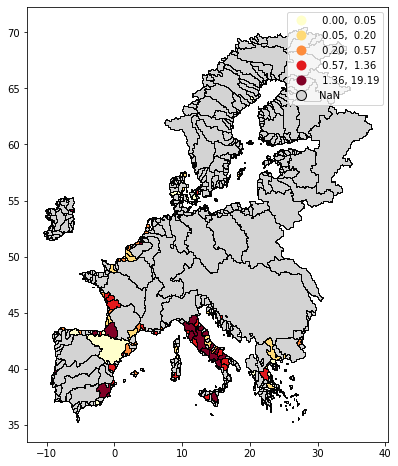

In [39]:
#map_LCIA_annual=gpd.read_file(dir_in+"/code/output/LCIA_NR.gpkg")

test[test!=0].plot(column="nr_exceed",
                     #categorical=False,
                     scheme="Quantiles",
                     edgecolor="k",
                     #vmin=0,
                     k=5,
                     legend=True,
                     #legend_kwds={'loc': "upper left"},
                     figsize=(8,8),
                     missing_kwds={'color': 'lightgrey'},
                   cmap="YlOrRd"
                     #legend_kwds={'label': "Total ecosystem damage from water use",'orientation': "horizontal"}
                    
                    )


In [40]:
continental_eu=LCIA_EQ.reset_index()[LCIA_EQ.reset_index()['id_basin_pcrglob']<14000]

In [46]:
#ecosystem quality - threshold test = 0.1/2 PDF.yr
threshold = 0.08/2#pdf.yr
#threshold = 0.28/2#pdf.yr
test=continental_eu.copy()
test.loc[test["eq"]<threshold,"log10eq"]=np.nan#problem with units. we havea  pdf.d and we need pdf.
test.loc[test["eq"]<threshold,"eq_exceed"]=test.loc[test["eq"]<=threshold,"eq"]-threshold
test.loc[test["eq"]<threshold,"eq"]=np.nan
test["eq_exceed"]=test["eq"]-threshold

test.loc[test["eq"]>threshold,"area"].sum()/continental_eu["area"].sum()*100

5.673134093908968

In [47]:
np.mean(pd.to_numeric(test.loc[test["eq"]>threshold,"eq_agri"].dropna())/test.loc[test["eq"]>threshold,"eq"].dropna())

0.23636022539939816

In [48]:
#calculate effort ofimpact reducton  persectorin these basins.
test.loc[test["eq"]>threshold,"sbt_agri"]=pd.to_numeric(test.loc[test["eq"]>threshold,"eq_agri"].dropna())/test.loc[test["eq"]>threshold,"eq"].dropna()
test.loc[test["eq"]>threshold,"sbt_ind"]=pd.to_numeric(test.loc[test["eq"]>threshold,"eq_ind"])/test.loc[test["eq"]>threshold,"eq"]
test.loc[test["eq"]>threshold,"sbt_dom"]=pd.to_numeric(test.loc[test["eq"]>threshold,"eq_dom"])/test.loc[test["eq"]>threshold,"eq"]
[test["sbt_agri"].mean(),test["sbt_dom"].mean(),test["sbt_ind"].mean()]

[0.23636022539939813, 0.18288772608051998, 0.6306489656104621]

In [44]:
temp=(test.loc[test["eq"]>threshold,"eq_exceed"]-threshold)/test.loc[test["eq"]>threshold,"eq"]
temp.mean()#reduction of agriculture impacts in (pdf.yr)

0.7947454430744314

In [45]:
temp=(test.loc[test["eq"]>threshold,"eq"]-threshold)*test.loc[test["eq"]>threshold,"sbt_agri"]/pd.to_numeric(test.loc[test["eq"]>threshold,"eq_agri"])
temp.mean()#reduction of agriculture impacts

0.8973727215372158

In [20]:
temp=(test.loc[test["eq"]>threshold,"eq"]-threshold)*test.loc[test["eq"]>threshold,"sbt_ind"]/pd.to_numeric(test.loc[test["eq"]>threshold,"eq_ind"])
temp.mean()

0.8942962476618113

In [21]:
temp=(test.loc[test["eq"]>threshold,"eq"]-threshold)*test.loc[test["eq"]>threshold,"sbt_dom"]/pd.to_numeric(test.loc[test["eq"]>threshold,"eq_dom"])
temp.mean()

0.8942962476618113

In [22]:
test["log10_eq_exceed"]=np.log10(test["eq_exceed"])

<AxesSubplot:>

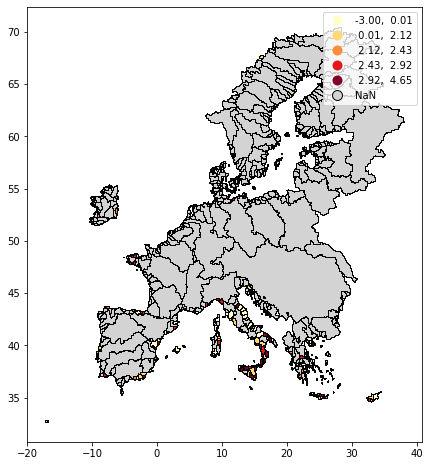

In [23]:
#map_LCIA_annual=gpd.read_file(dir_in+"/code/output/LCIA_NR.gpkg")

test[test!=0].plot(column="log10_eq_exceed",#this is wrong 
                     #categorical=False,
                     scheme="Quantiles",
                     edgecolor="k",
                     #vmin=0,
                     k=5,
                     legend=True,
                     #legend_kwds={'loc': "upper left"},
                     figsize=(8,8),
                     missing_kwds={'color': 'lightgrey'},
                   cmap="YlOrRd"
                     #legend_kwds={'label': "Total ecosystem damage from water use",'orientation': "horizontal"}
                    
                    )

<AxesSubplot:>

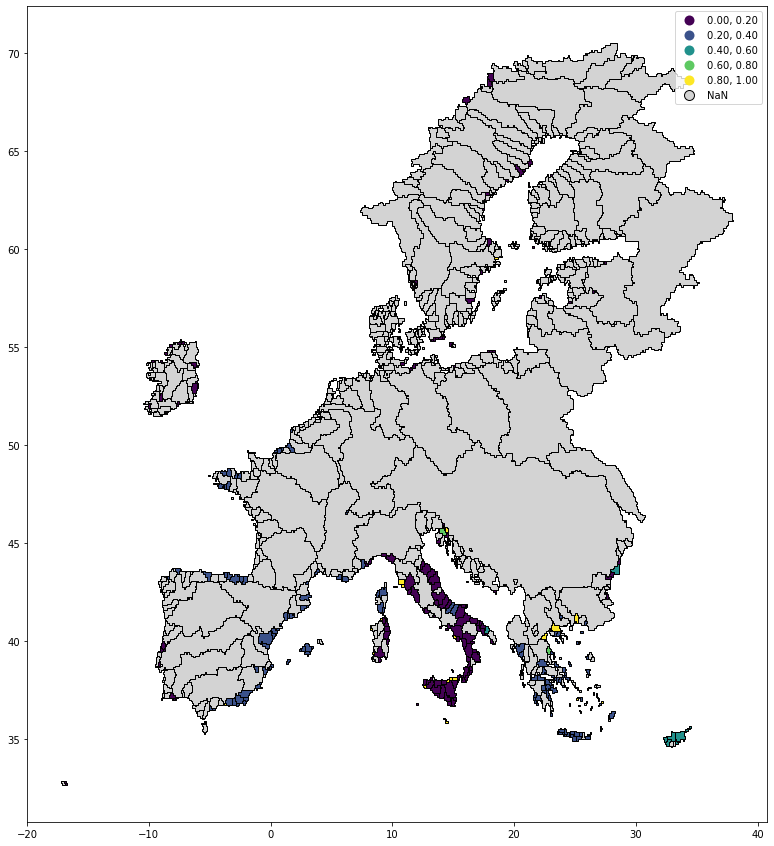

In [32]:

test.plot(column="sbt_agri",#this is wrong 
                     #categorical=False,
                     scheme="EqualInterval",
                     edgecolor="k",
                     #vmin=0,
                     k=5,
                     legend=True,
                     #legend_kwds={'loc': "upper left"},
                     figsize=(15,15),
                     missing_kwds={'color': 'lightgrey'}
                     #legend_kwds={'label': "Total ecosystem damage from water use",'orientation': "horizontal"}
                    
                    )

<AxesSubplot:>

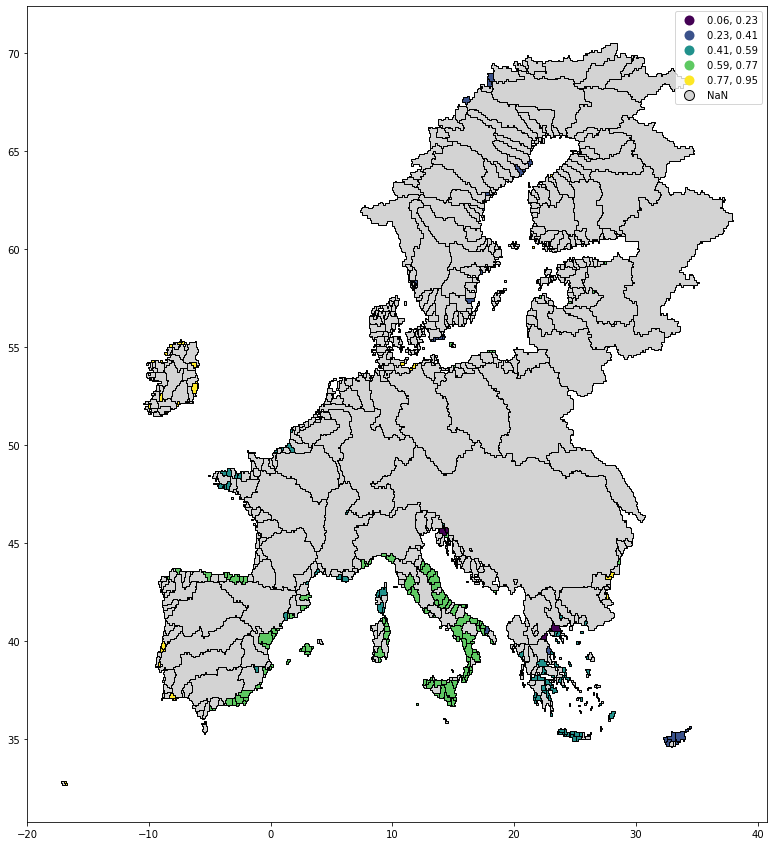

In [38]:

test.plot(column="sbt_ind",#this is wrong 
                     #categorical=False,
                     scheme="EqualInterval",
                     edgecolor="k",
                     #vmin=0,
                     k=5,
                     legend=True,
                     #legend_kwds={'loc': "upper left"},
                     figsize=(15,15),
                     missing_kwds={'color': 'lightgrey'}
                     #legend_kwds={'label': "Total ecosystem damage from water use",'orientation': "horizontal"}
                    
                    )

<AxesSubplot:>

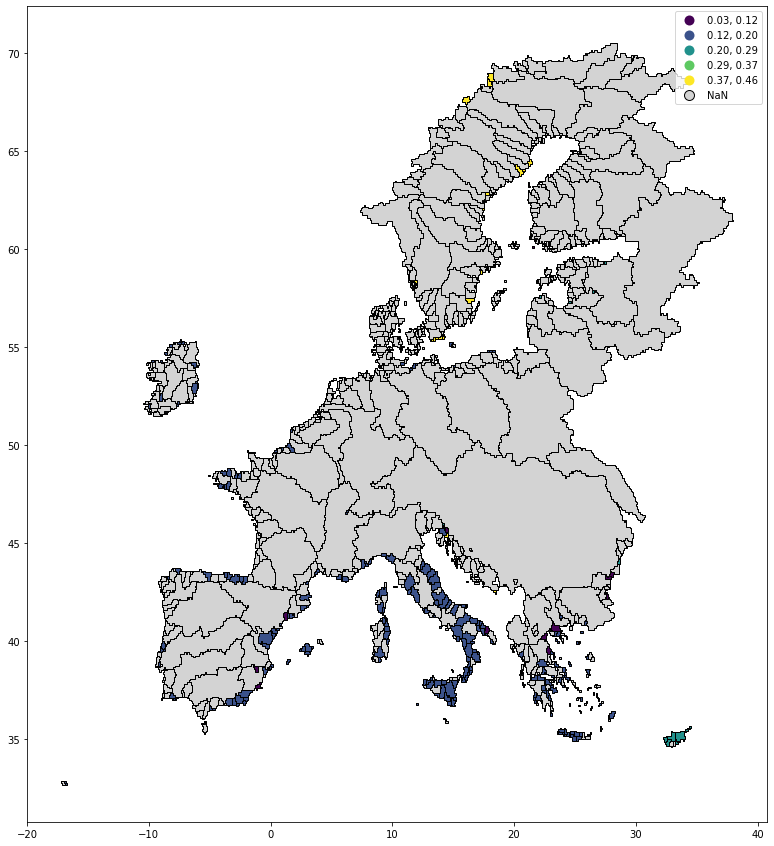

In [39]:

test.plot(column="sbt_dom",#this is wrong 
                     #categorical=False,
                     scheme="EqualInterval",
                     edgecolor="k",
                     #vmin=0,
                     k=5,
                     legend=True,
                     #legend_kwds={'loc': "upper left"},
                     figsize=(15,15),
                     missing_kwds={'color': 'lightgrey'}
                     #legend_kwds={'label': "Total ecosystem damage from water use",'orientation': "horizontal"}
                    
                    )